# Clustering with K-Means


The fundamental task that one performs when encountered with unlabelled data is clustering of similar data points, this task is known as **Clustering**, one of the common algorithm used to cluster the data points is K-means.

Clustering is commonly used to explore a dataset. Social networks can be clustered to identify communities and to suggest missing connections between people. In biology, clustering is used to find groups of genes with similar expression patterns. Recommendation systems sometimes employ clustering to identify products or
media that might appeal to a user. In marketing, clustering is used to find segments of similar consumers.

**Algorithm invloved:**

**1. Identify Initial Clusters**

First identify k clusters, it can be random, where K is a hyperparameter. Identify the significant clusters and this process is iterative. If the distance between the observation and its closest cluster center is greater than the distance between the others closest cluster centers(Cluster 1, Cluster 2 …), then the observation will replace the cluster center depending on which one is closer to the observation.

**2. Allocate Observations to the Closest Cluster**
Each observation is allocated to the closest cluster, and the distance between an observation and a cluster is calculated from the Euclidean distance between the observation and the cluster center.Each cluster center will then be updated as the mean for observations in each cluster.
The within-cluster sum of squares is:
![formula](https://discourse-cdn-sjc1.com/business/uploads/analyticsvidhya/original/1X/11ba62446eb2cfeab14b50dcfd685b2e1962a4e2.PNG)

We perform this exercise in a loop to find updated cluster centers and allocation of each observation. The iteration will stop when the maximum number of iterations is reached or the change of within-cluster sum of squares in two successive iterations is less than the threshold value. The updated cluster centers for the last iteration are called Final Cluster Centers.


**To check the right number of clusters**
*Elbow method*:
One common method of choosing the appropriate cluster solution is to compare the sum of squared error (SSE) for a number of cluster solutions. SSE is defined as the sum of the squared distance between each member of a cluster and its cluster centroid. Thus, SSE can be seen as a global measure of error. In general, as the number of clusters increases, the SSE should decrease because clusters are, by definition, smaller. A plot of the SSE against a series of sequential cluster levels can provide a useful graphical way to choose an appropriate cluster level.

In [1]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

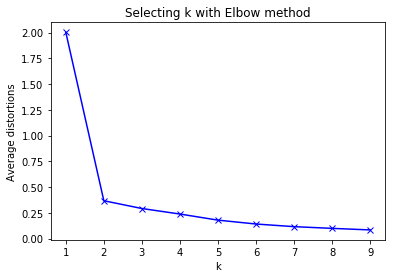

In [2]:
cluster1 = np.random.uniform(0.5,1.5,(2,10))
cluster2 = np.random.uniform(3.5,4.5,(2,10))
X = np.hstack((cluster1, cluster2)).T

K = range(1,10)
meandistortions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                           'euclidean'), axis=1))/ X.shape[0])
    

plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortions')
plt.title('Selecting k with Elbow method')
plt.show()

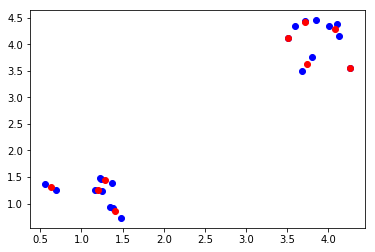

In [3]:
for point in X:
    plt.plot(point[0],point[1],'bo')
for center in kmeans.cluster_centers_:
    plt.plot(center[0],center[1], 'ro')
plt.show()

In [4]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
print kmeans.predict(X)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


## Evaluating Clusters
K-Means is an unsupervised learning algorithm; there are no labels or ground truth to compare with the clusters. However, we can still evaluate the performance of the algorithm using intrinsic measures. We have already discussed measuring the distortions of the clusters. In this section, we will discuss another performance measure for clustering called the **silhouette coefficient**.

**SILHOUETTE COEFFICIENT**
The silhouette coefficient is a measure of the compactness and separation of the clusters. It increases as the quality of the clusters
increase; it is large for compact clusters that are far from each other and small for large, overlapping clusters. The silhouette coefficient is calculated per instance; for a set of
instances, it is calculated as the mean of the individual samples' scores. The silhouette coefficient for an instance is calculated with the following equation:
![formula](http://content.edupristine.com/images/blogs/Beyond_the_k-Means_4.png)
a is the mean distance between the instances in the cluster. b is the mean distance between the instance and the instances in the next closest cluster. 

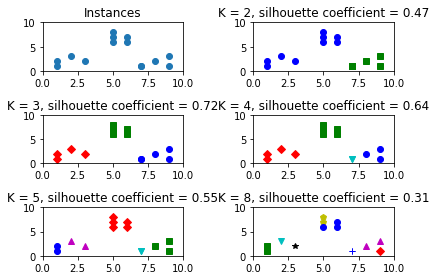

In [5]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

plt.subplot(3,2,1)
x1 = np.array([1, 2, 3, 1, 5, 6, 5, 5, 6, 7, 8, 9, 7, 9])
x2 = np.array([1, 3, 2, 2, 8, 6, 7, 6, 7, 1, 2, 1, 1, 3])

X = np.array(zip(x1,x2)).reshape(len(x1), 2)

plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Instances')
plt.scatter(x1,x2)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ['o', 's', 'D', 'v', '^', 'p', '*', '+']
tests = [2, 3, 4, 5, 8]
subplot_counter = 1
for test in tests:
    subplot_counter += 1
    plt.subplot(3, 2, subplot_counter)
    kmeans_model = KMeans(n_clusters= test).fit(X)
    for i, l in enumerate(kmeans_model.labels_):
        plt.plot(x1[i], x2[i], color = colors[l], marker= markers[l])
        plt.xlim([0, 10])
        plt.ylim([0, 10])
        plt.title('K = %s, silhouette coefficient = %.02f' % (
        test, metrics.silhouette_score(X, kmeans_model.labels_,
                                   metric='euclidean')))

plt.tight_layout()
plt.show()

## Image Quantization

Image quantization is a lossy compression method that replaces a range of similar colors in an image with a single color. Quantization reduces the size of the image file since fewer bits are required to represent the colors.
We'll use K-Means algorithm to make clusters of random colors in only 64 colors in the following code:

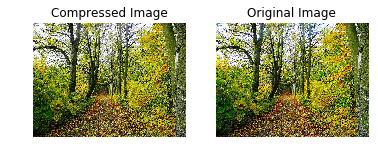

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
import mahotas as mh

original_img = np.array(mh.imread('img.jpg'), dtype=np.float64)/255
original_dimensions = tuple(original_img.shape)
width, height, depth = tuple(original_img.shape)
image_flattened = np.reshape(original_img, (width*height, depth))

image_array_sample = shuffle(image_flattened, random_state=0)[:1000]
estimator = KMeans(n_clusters=64)
estimator.fit(image_array_sample)

cluster_assignments = estimator.predict(image_flattened)
compressed_palette = estimator.cluster_centers_
compressed_img = np.zeros((width, height, compressed_palette.shape[1]))
label_idx = 0
for i in range(width):
    for j in range(height):
        compressed_img[i][j] = compressed_palette[cluster_assignments[label_idx]]
        label_idx += 1

plt.subplot(122)
plt.title('Original Image')
plt.imshow(original_img)
plt.axis('off')
plt.subplot(121)
plt.title('Compressed Image')
plt.imshow(compressed_img)
plt.axis('off')
plt.show()

## Clustering to learn features

We will combine clustering with classification in a semi-supervised
learning problem.

Let's build a semi-supervised learning system that can classify
images of cats and dogs.
A naïve approach to classifying images is to use the intensities, or brightnesses, of all of the pixels as
explanatory variables. This approach produces high-dimensional feature vectors for even small images. Unlike the high-dimensional feature vectors we used to represent documents, these vectors are not sparse. Furthermore, it is obvious that this approach is sensitive to the image's illumination, scale, and orientation.

SIFT and SURF descriptors, which describe interesting regions of an image in ways that are invariant to scale, rotation, and illumination. In this example, we will cluster the descriptors extracted from all of the images to learn features. We will then represent an image with a vector with one element for each cluster. Each element will encode the number of descriptors extracted from the image that were assigned to the cluster. This approach is sometimes called
the bag-of-features representation, as the collection of clusters is analogous to the bag-of-words representation's vocabulary.


In [ ]:
import numpy as np
import mahotas as mh
from mahotas.features import surf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.cluster import MiniBatchKMeans
import glob

all_instances_filename = []
all_instances_target = []
for f in glob.glob('cats-and-dogs-img/*'):
    target = 1 if 'cat' in f.split('/')[1] else 0
    all_instances_filename.append(f)
    all_instances_target.append(target)
surf_features = []
counter = 0
for f in all_instances_filename:
    print 'Reading image:', f
    image = mh.imread(f, as_grey= True)
    surf_features.append(surf.surf(image)[:, 5:])
    
train_len = int(len(all_instances_filename)*0.7)
X_train_surf_features = np.concatenate(surf_features[:train_len])
X_test_surf_features = np.concatenate(surf_features[train_len:])
y_train = all_instances_target[:train_len]
y_test = all_instances_target[train_len:]

n_clusters = 300
print 'Clustering', len(X_train_surf_features), 'features'
estimator = MiniBatchKMeans(n_clusters=n_clusters)
estimator.fit_transform(X_train_surf_features)

In [13]:
X_train = []
for instance in surf_features[:train_len]:
    if instance.shape[0]>0:
        clusters = estimator.predict(instance)
        features = np.bincount(clusters)
        if len(features)< n_clusters:
            features = np.append(features, np.zeros((1, 
                                n_clusters-len(features))))
        X_train.append(features)
X_test = []
for instance in surf_features[train_len:]:
    if instance.shape[0]>0:
        clusters = estimator.predict(instance)
        features = np.bincount(clusters)
        if len(features)< n_clusters:
            features = np.append(features, np.zeros((1, 
                                n_clusters-len(features))))
        X_test.append(features)

In [16]:
clf = LogisticRegression(C = 0.0001, penalty='l2')
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [22]:
print classification_report(y_test[:-2], predictions)

             precision    recall  f1-score   support

          0       1.00      0.15      0.25       598
          1       0.00      0.00      0.00         0

avg / total       1.00      0.15      0.25       598



/home/prakhar/Desktop/scikit/venv/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
